In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [24]:
def get_dipole_moments(n_wat, n_samples=5000):
    total_dipole_magn_list = []
    total_dipole_list = []

    for i in range(n_samples):
        dipole_moment_mag_water = 1.84 # Dipole moment of single water molecule, in Debyes
        mu, sigma = 0, 1.0 # mean and standard deviation
        s = np.random.normal(mu, sigma, (n_wat,3))
        norms = np.linalg.norm(s, axis=1)
        # print(norms.shape)
        # print(norms)

        dipoles = dipole_moment_mag_water * np.array([d/dn for d,dn in zip(s,norms)])
        total_dipole = np.sum(dipoles,axis=0)
        total_dipole_list.append(total_dipole)
        total_dipole_magn = np.linalg.norm(total_dipole)
        total_dipole_magn_list.append(total_dipole_magn)
        # print(total_dipole_magn)

        # print(np.linalg.norm(total_dipole)/n_wat)
    total_dipole_exp = np.mean(total_dipole_magn_list)
    total_dipole_stdev = np.std(total_dipole_magn_list)
    # Std deviation and mean of the dipole vector of the box
    dipole_vec_exp = np.mean(total_dipole_list, axis=0)
    dipole_vec_stdev = np.std(total_dipole_list, axis=0)
    res_dict = {"total_dipole_moment_exp": total_dipole_exp, "total_dipole_moment_stdev": total_dipole_stdev, "dipole_vector_exp": dipole_vec_exp, "dipole_vec_stdev":dipole_vec_stdev, "dipole_magnitude_list": total_dipole_magn_list}
    return res_dict

In [25]:
n_wat = np.array(range(10, 500, 10))
res = [get_dipole_moments(wat_i) for wat_i in n_wat ]

In [27]:
moment_mag_exp =    np.array([res_i["total_dipole_moment_exp"] for res_i in res])
moment_mag_stdev =  np.array([res_i["total_dipole_moment_stdev"] for res_i in res])
moment_vec_exp =    np.array([res_i["dipole_vector_exp"] for res_i in res])
moment_vec_stdev =  np.array([res_i["dipole_vec_stdev"] for res_i in res])
dipole_moment_magnitudes_list = np.array([res_i["dipole_magnitude_list"] for res_i in res])

np.save("moment_mag_exp.npy", moment_mag_exp) 
np.save("moment_mag_stdev.npy", moment_mag_stdev) 
np.save("moment_vec_exp.npy", moment_vec_exp) 
np.save("moment_vec_stdev.npy", moment_vec_stdev) 
np.save("n_wat.npy", n_wat) 
np.save("dipole_moment_magnitudes_list.npy", dipole_moment_magnitudes_list)

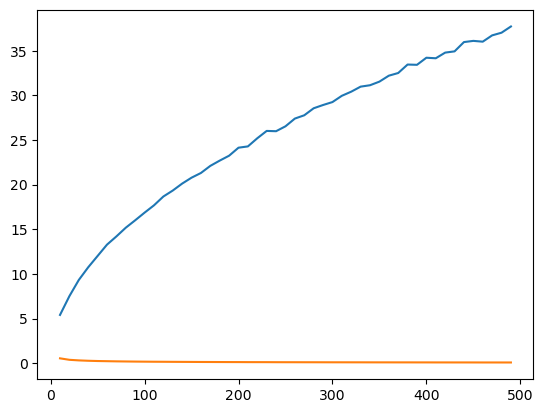

In [28]:
import matplotlib.pyplot as plt

plt.plot(n_wat, moment_mag_exp, label = "expectation value of magnitude of sum of all dipoles")
plt.plot(n_wat, moment_mag_exp/n_wat, label="expectation value of magnitude of mean of all dipoles")

# plt.plot(n_wat, moment_mag_stdev, label = "expectation value of magnitude of sum of all dipoles")
# plt.plot(n_wat, moment_mag_stdev/n_wat, label="expectation value of magnitude of mean of all dipoles")


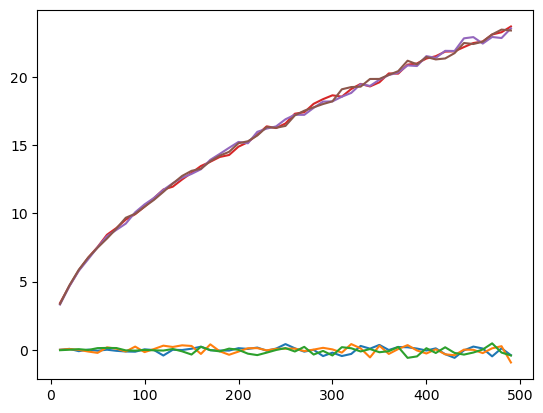

In [29]:
plt.plot(n_wat, moment_vec_exp, label = "expectation value of components of sum of all dipoles")
plt.plot(n_wat, moment_vec_stdev, label="expectation value of magnitude of mean of all dipoles")

# plt.plot(n_wat, [m/n for m,n in zip(moment_vec_exp, n_wat )], label = "expectation value of components of sum of all dipoles")
# plt.plot(n_wat, [m/n for m,n in zip(moment_vec_stdev, n_wat )], label="expectation value of magnitude of mean of all dipoles")


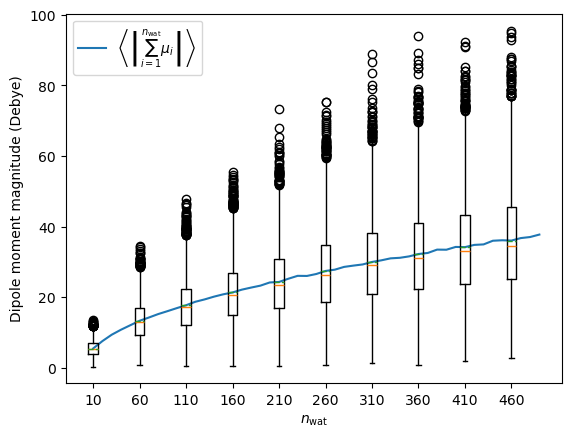

In [58]:
# Dipole moment magnitude (expectation and standard deviation) with box size
fig, ax = plt.subplots()
ax.plot(n_wat, moment_mag_exp, marker = None ,label = r"$\left\langle \left| \sum_{i=1}^{n_{\text{wat}}} \mu_i \right| \right\rangle$", color='C0')
# ax.fill_between(n_wat, moment_mag_exp-moment_mag_stdev, moment_mag_exp+moment_mag_stdev, color='C0', alpha=0.5)

# box plot!
n_stride = 5
ax.boxplot(dipole_moment_magnitudes_list.T[:,::n_stride], meanline=True, showmeans=True, positions=n_wat[::n_stride], widths=10)

ax.set_xlabel(r"$n_{\text{wat}}$")
ax.set_ylabel("Dipole moment magnitude (Debye)")
ax.legend()
fig.savefig("moment_magnitude.png", dpi=300)

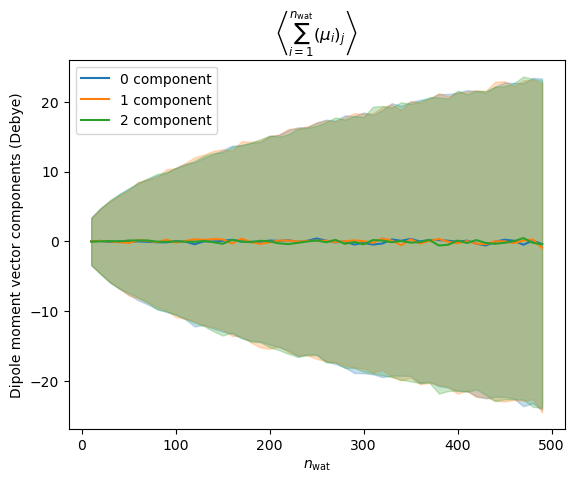

In [57]:
# Dipole moment vector (expectation and standard deviation) with box size
fig, ax = plt.subplots()

for j in [0,1,2]:
    ax.plot(n_wat, moment_vec_exp[:,j], marker = None ,label = f"{j} component", color=f'C{j}')
    ax.fill_between(n_wat, moment_vec_exp[:,j]-moment_vec_stdev[:,j], moment_vec_exp[:,j]+moment_vec_stdev[:,j], color=f'C{j}', alpha=0.25)

ax.set_title(r"$\left\langle \sum_{i=1}^{n_{\text{wat}}} (\mu_{i})_j \right\rangle$")
ax.set_xlabel(r"$n_{\text{wat}}$")
ax.set_ylabel("Dipole moment vector components (Debye)")
ax.legend()
fig.savefig("moment_vector.png", dpi=300)